<b><font size="5">PDS Group Project - Where Should I Live? </font></b>

<font size="5">Group 10: </font>
 - Lucas Casimiro (20241796)
 - Lucas Christol (20241827)
 - Miguel Gomes (20241793)
 - Pedro Ferreira (20241735)

Public GitHub repository:
https://github.com/lucasvcasimiro-byte/Group10_PDS_Project_2526


### <font color='#BFD72F'>Table of Contents </font> <a class="anchor" id='toc'></a> 

- [1. Data Wrangling and Analysis](#P1) 
    - [Importation](#P1.1)
    - [Data Cleaning](#P1.2)
    - [Answers to assigned questions](#P1.3)

- [2. Advanced Topic - Building an Interactive Map](#P2) 
    - [Web Scraping](#P2.1)
    - [Interactive Map](#P2.2)

- [3. Data Science In Action](#P3)

<hr style = "border: 3px solid' #BFD72F';">

### <font color='#BFD72F'>1. Data Wrangling and Analysis</font> <a class="anchor" id="P1"></a>

#### 1.1 Importation <a class="anchor" id="P1.1"></a>

We start by importing all necessary libraries:

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup
import time
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)

pandas: 2.3.2
numpy: 2.3.3
seaborn: 0.13.2


Next, importing the dataset and fixing easily solvable small issues for better reading.

In [2]:
city_data = pd.read_csv('city_data.csv',sep='|',header=1)
city_data.index=city_data.index + 1
city_data.rename(columns={'Avgerage Rent Price': 'Average Rent Price'}, inplace=True)
city_data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
1,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
2,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
3,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
4,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
5,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


#### 1.2 Data Cleaning <a class="anchor" id="P1.1"></a>

Collecting the initial information so we know the basic issues:

In [3]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 1 to 86
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Average Rent Price               86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In [4]:
city_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Population Density,85.0,1.115141e+03,2.542779e+03,65.00,304.000,548.00,1020.000,20983.0
Population,86.0,1.754370e+06,1.843133e+06,73895.00,528118.500,1178397.00,2315896.000,12396541.0
Working Age Population,85.0,1.158294e+06,1.232534e+06,46359.00,358020.000,733794.00,1534225.000,8274794.0
Youth Dependency Ratio,86.0,2.409686e+01,3.266421e+00,19.30,21.425,23.15,25.925,37.8
Unemployment Rate,85.0,6.667059e+00,4.553632e+00,1.40,3.700,5.30,8.100,23.0
GDP per Capita,85.0,5.175027e+04,2.149562e+04,10089.92,38664.000,49329.00,63083.000,146094.0
Days of very strong heat stress,86.0,4.348837e+00,1.003848e+01,0.00,0.000,1.00,3.000,59.0
Average Monthly Salary,86.0,2.434488e+03,1.188603e+03,750.00,1412.500,2400.00,3200.000,6636.0
Average Rent Price,86.0,1.070105e+03,4.989646e+02,100.00,800.000,1050.00,1250.000,3190.0
Average Cost of Living,86.0,1.808384e+03,7.279997e+02,800.00,1300.000,1665.00,2100.000,4862.0


We then create a column for only the city and one for only the country, for more clarity and easier processes in the rest of the notebook.

In [5]:
# Creating a copy to edit without affecting the original dataset
city_data_copy = city_data.copy()

# Standardizing the separators with Regex to handle incorrect cases (';' or '.' instead of ',')
city_data_copy['City_Fixed'] = city_data_copy['City'].astype(str).apply(lambda x: re.sub(r'\s*[.;]\s*', ', ', x.split('\n')[0]).strip())

# Fixing a specific wrong value
city_data_copy['City_Fixed'] = city_data_copy['City_Fixed'].replace({'Greece, Athens': 'Athens, Greece'})

# Splitting the data into a separate dataset, using comma only to include cases where there is no space between comma and country
split_data = city_data_copy['City_Fixed'].str.split(',', n=1, expand=True)

# Creating the new columns in the original dataset and replacing the 'City' with its fixed version (including the .str.strip() method to clean any hidden spaces left by the split)
city_data['City_Only'] = split_data[0].str.strip()
city_data['Country'] = split_data[1].str.strip()

# Making sure the 'City' column in the original dataset is clean
city_data['City'] = city_data['City_Only'] + ', ' + city_data['Country']

city_data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update,City_Only,Country
1,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00,Vienna,Austria
2,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00,Salzburg,Austria
3,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00,Brussels,Belgium
4,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00,Antwerp,Belgium
5,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00,Gent,Belgium


#### Duplicate entries <a class="anchor" id="P1.1"></a>

We identified how many duplicate rows there were, and removed them from the dataset.

In [6]:
# Handling duplicates 
duplicates = city_data.duplicated().sum()
print(f'{duplicates} duplicate rows found')
if duplicates > 0:
    city_data.drop_duplicates(inplace=True)

2 duplicate rows found


In [7]:
#Check if duplicate rows were deleted
duplicates_check = city_data.duplicated().sum()
print(f'{duplicates_check} duplicate rows found')

0 duplicate rows found


#### Outliers <a class="anchor" id="P1.1"></a>

For outliers, no measures were took, as this dataset's information is bound to have outliers, and no detected numerical values were unrealistic.

IndexError: index 6 is out of bounds for axis 0 with size 6

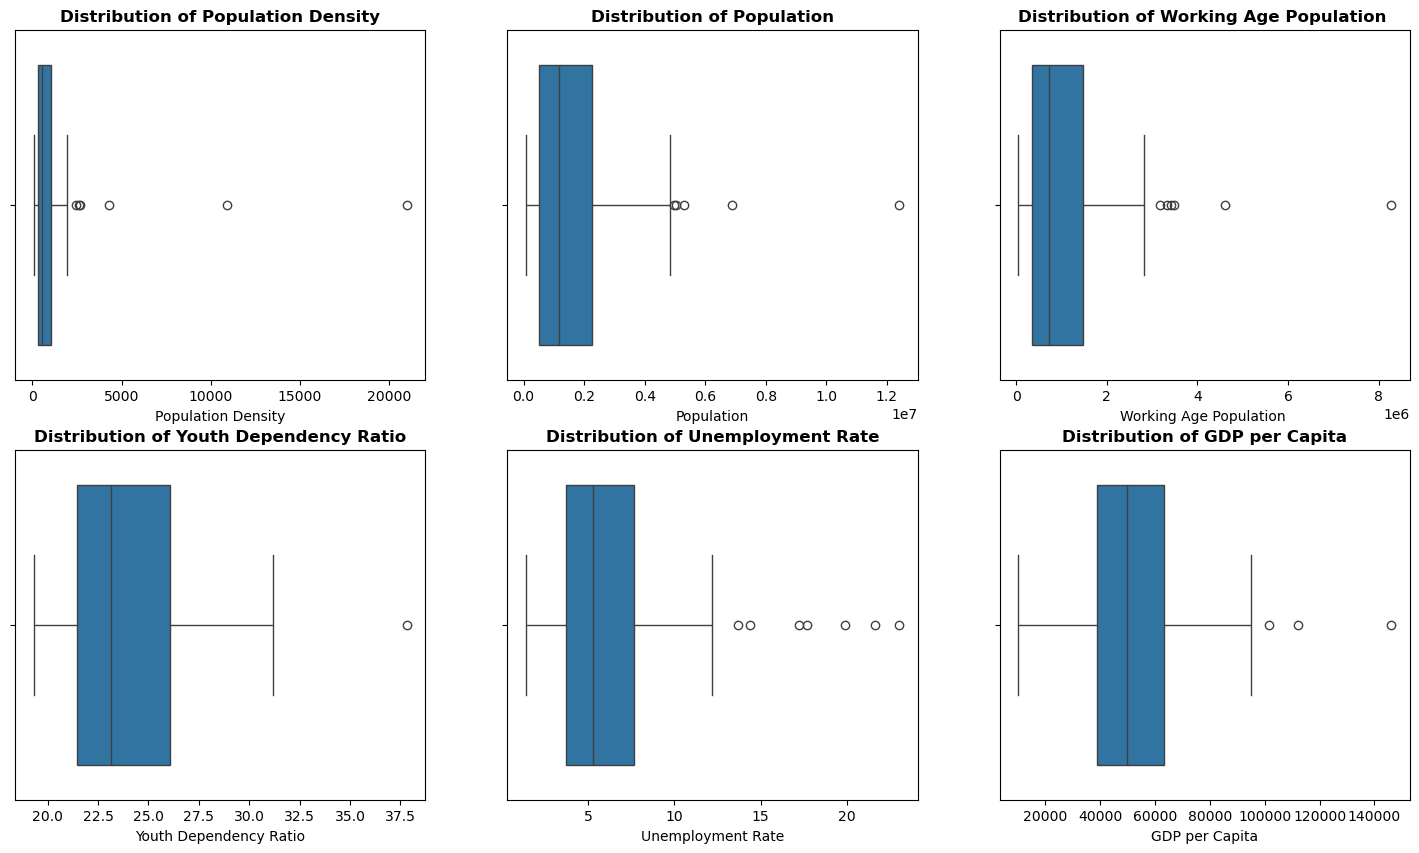

In [ ]:
num_cols = ['Population Density', 'Population', 'Working Age Population', 'Youth Dependency Ratio', 'Unemployment Rate',
             'GDP per Capita', 'Days of very strong heat stress', 'Average Monthly Salary', 'Average Rent Price', 'Average Cost of Living']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x=city_data[col], ax=axes[i])
    
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')

plt.tight_layout()
plt.show()


#### Missing Values <a class="anchor" id="P1.1"></a>

In [8]:
# Handling missing values (from info())
#'Average Price Groceries' has 80 missing values out of 86, so it won't be useful
city_data.drop('Average Price Groceries', axis=1, inplace = True)

In [9]:
#Checking which is the missing categorical value from the 'Main Spoken Languages' column, to see if it is possible to make an assumption on the native country language
missing_languages_row = city_data[city_data['Main Spoken Languages'].isnull()]
missing_languages_row

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,City_Only,Country
25,"Dusseldorf, Germany",1295.0,1554077,NaN,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15 00:00:00,Dusseldorf,Germany


In [10]:
# Filling numerical missing values with the median/mean (deciding on skewness)
num_cols = ['Population Density', 'Working Age Population ', 'Unemployment Rate', 'GDP per Capita']
for col in num_cols:
    no_na = city_data[col].dropna()
    if no_na.empty:
        continue
    skew_val = no_na.skew()
    if abs(skew_val) > 1:
        fill_value = no_na.median()
        method = "median"
    else:
        fill_value = no_na.mean()
        method = "mean"     
    city_data[col].fillna(fill_value, inplace=True)
    print(f"Filled '{col}' using {method} (skewness={skew_val:.2})")

# Filling categorical value with 'German'
city_data['Main Spoken Languages'].fillna('German', inplace=True)


Filled 'Population Density' using median (skewness=6.4)
Filled 'Working Age Population ' using median (skewness=3.1)
Filled 'Unemployment Rate' using median (skewness=1.8)
Filled 'GDP per Capita' using median (skewness=1.3)


#### 1.3 Answers to assigned questions <a class="anchor" id="P1.1"></a>

1. How did you handle missing values and duplicate records in the dataset?
 - Duplicates:
     - We checked for duplicates and found out there were 2 duplicate rows. We made an 'if' condition, which dropped these if they existed, which they did.
 - Missing values:
     - 'Average Price Groceries' had 80 missing values out of 86, so we dropped the whole column.
     - For the numerical columns with missing values, we filled these with the median or mean. As these were only missing 1 value, we decided to use the mean if the skewness was between -1 and 1, and median otherwise, which ended up being the case for every column.
     - For the column 'Main Spoken Languages', we filled the missing value with 'German'. We checked the specific city (Dusseldorf) and made an assumption that the native country language was spoken, not excluding the fact that there could be other languages not being counted.



2. a) Which country appears most frequently in the dataset? How many cities are associated with it?

As we've previously created distinct columns for city and country, we can just use the country column's counts.

In [11]:
# Counting how many times each country appears, and then identifying which country it is and how many cities are associated with it
country_counts = city_data['Country'].value_counts()
print(f'The country that appears the most is {country_counts.idxmax()}, which has {country_counts.max()} cities associated with it.')

The country that appears the most is Germany, which has 10 cities associated with it.


2. b) How many cities are present in total? How many are associated with Greece?

In [12]:
# Counting the values in the first columns, which represent the ammount of cities
city_total = city_data.shape[0]

# Counting how many of the cities are associated with Greece
greece_cities = city_data[city_data['Country'] == 'Greece'].shape[0]

print(f'There are {city_total} cities in total.')
print(f'There are {greece_cities} cities associated with Greece.')

There are 84 cities in total.
There are 2 cities associated with Greece.


2. c) Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?

In [13]:
# Making a list of all languages 
languages = city_data['Main Spoken Languages'].str.split(',').explode().str.strip()
languages_counts = languages.value_counts()
print(f'The least spoken language is {languages_counts.idxmin()}, which is only spoken in {languages_counts.min()} city/cities.')
print(f'The top 3 most spoken languages are \n{languages_counts.head(3)}')

The least spoken language is Latvian, which is only spoken in 1 city/cities.
The top 3 most spoken languages are 
Main Spoken Languages
English    46
German     15
Turkish    10
Name: count, dtype: int64


3. a) Entries uploaded before April 2023 need to be updated. Which cities would require an update?

In [14]:
# Turning the date strings into the date datatype
city_data['Last Data Update'] = pd.to_datetime(city_data['Last Data Update'], errors = 'coerce')

# Making sure there are no invalid or missing date entries, to assure we can check every entry
num_errors = city_data['Last Data Update'].isna().sum()
print(f"Number of invalid or missing date entries: {num_errors}")

# Checking for entries before the cutoff date
cutoff_date = pd.Timestamp('2023-04-01')
cities_need_update = city_data[city_data['Last Data Update'] < cutoff_date]
print("\nCities that need to be updated (data older than April 2023):")
print(cities_need_update[['City_Only', 'Country', 'Last Data Update']])

Number of invalid or missing date entries: 0

Cities that need to be updated (data older than April 2023):
            City_Only      Country Last Data Update
11              Basel  Switzerland       2023-01-19
19             Munich      Germany       2023-03-16
21  Frankfurt am Main      Germany       2023-02-04
39               Lyon       France       2023-03-31
60             Venice        Italy       2023-03-23
83         Gothenburg       Sweden       2023-03-10


3. b) How many days ago was the last update? On what day, month, and year did
            it occur?

In [15]:
# Checking the most recent date 
last_update_date = city_data['Last Data Update'].max()

# Creating today's date as a variable
today = pd.Timestamp.today()

# Calculating the time difference between both
days_since_update = (today - last_update_date).days
print(f"The most recent data update was on {last_update_date:%Y %B %d}.")
print(f"That was {days_since_update} days ago.")


The most recent data update was on 2024 December 12.
That was 355 days ago.


4. a) How are the Unemployment Rate and GDP per Capita distributed and
            related? What does this relationship suggest? 
            Provide a visual representation

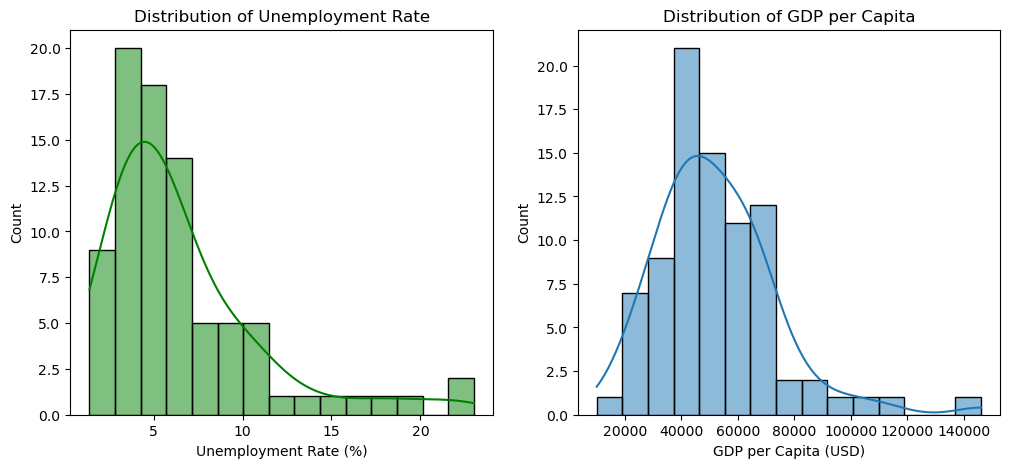

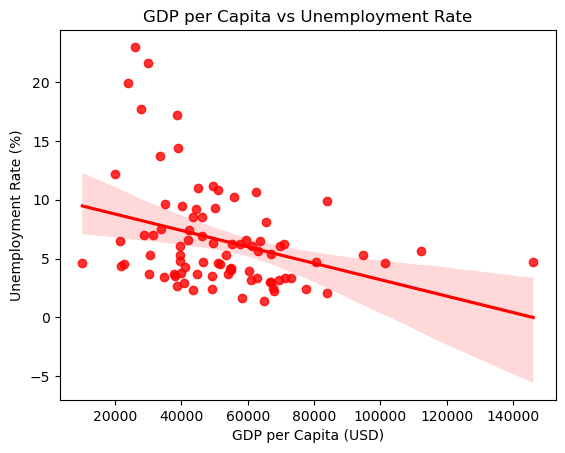

Correlation between GDP per Capita and Unemployment Rate: -0.34


In [16]:
plt.figure(figsize=(12,5))
# Creating an histogram to visualize the Unemployment Rate distribution
plt.subplot(1,2,1)
sns.histplot(data = city_data, x = 'Unemployment Rate', bins=15, kde=True,  color = 'green')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')

# Creating an histogram to visualize the GDP per Capita distribution
plt.subplot(1,2,2)
sns.histplot(data = city_data, x = 'GDP per Capita', bins=15, kde=True)
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita (USD)')

plt.show()

# Creating a scatter plot with a regression line
sns.regplot(data = city_data, x ='GDP per Capita', y = 'Unemployment Rate', scatter=True, color = 'red')
plt.title('GDP per Capita vs Unemployment Rate')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

correlation = city_data['GDP per Capita'].corr(city_data['Unemployment Rate'])
print(f"Correlation between GDP per Capita and Unemployment Rate: {correlation:.2f}")



We can conclude that there's a moderate negative correlation between the 2 columns. This suggests that wealthier cities tend to have a lower unemployment rate, and that poorer citie have less robust working markets. However, the spread of the scatter points indicates that there are other factors impacying unemployment.

4. b) Which are the top 5 cities with the largest difference between the Average
            Monthly Salary and Average Cost of Living? 
            What about the top 5 countries with the smallest average difference? 
            Show these results with meaningful visualizations

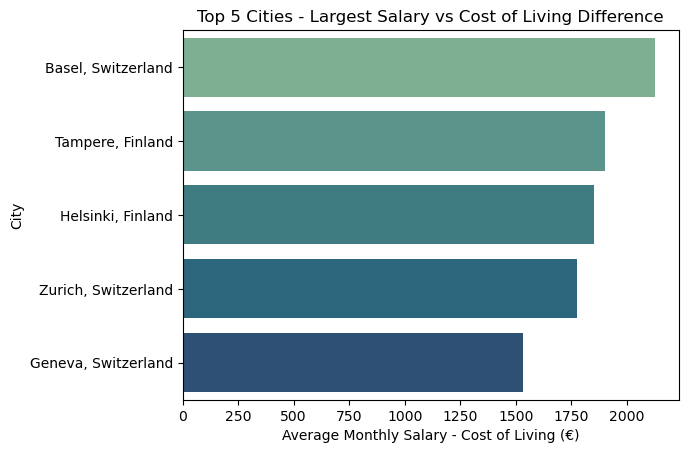

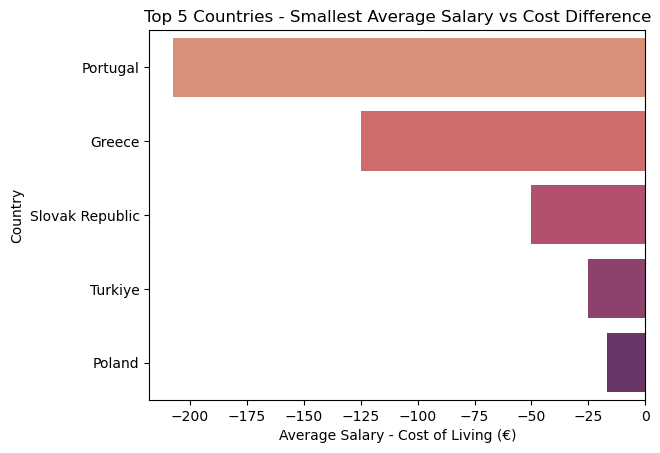

In [17]:
# Making a copy of the dataset to create new columns for visualization purposes without affecting the original dataset
city_data_copy2 = city_data.copy()

# Creating a new column that represents the difference between the average monthly salary and the average cost of living in each city
city_data_copy2['Salary-Living Diff'] = city_data['Average Monthly Salary'] - city_data['Average Cost of Living']
# Using the newly created column to isolate data for the plots creation
top5_cities = city_data_copy2.nlargest(5, 'Salary-Living Diff')
avg_country_diff = city_data_copy2.groupby('Country')['Salary-Living Diff'].mean().nsmallest(5)

# Creating a barplot that organizes the 5 cities with the largest average salary vs cost of living difference 
sns.barplot(data=top5_cities, x='Salary-Living Diff', y='City', palette='crest')
plt.title('Top 5 Cities - Largest Salary vs Cost of Living Difference')
plt.xlabel('Average Monthly Salary - Cost of Living (€)')
plt.ylabel('City')
plt.show()

# Creating a barplot that organizes the 5 countries with the smallest average salary vs cost of living difference
sns.barplot(x=avg_country_diff.values, y=avg_country_diff.index, palette='flare')
plt.title('Top 5 Countries - Smallest Average Salary vs Cost Difference')
plt.xlabel('Average Salary - Cost of Living (€)')
plt.ylabel('Country')
plt.show()

5. Additional Insights

Note: for all these insights, we will use the copied dataset from the previous visualization, so we can create new features without affecting the original dataset.


Insight 1: Wage share gap

Comparing annualized salary to the GDP per Capita will show how much of the city's economic value is captured by the average worker.

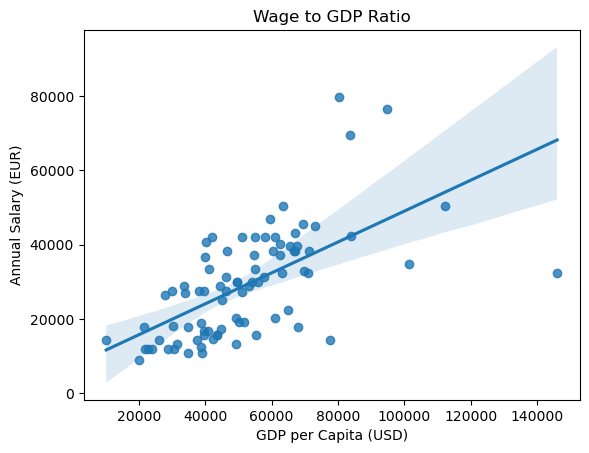

The correlation between GDP per Capita and Annual Salary is 0.62

Cities where workers get the best share of GDP:
                 City  Wage_GDP_Ratio
8   Dobrich, Bulgaria      142.716692
28    Odense, Denmark      101.230647
37   Tampere, Finland      100.109644

Cities where workers get the lowest share of GDP:
                           City  Wage_GDP_Ratio
80  Bratislava, Slovak Republic       18.590960
54                Cork, Ireland       22.177502
72               Warsaw, Poland       26.472924


In [18]:
# Consider the annual salary as 12 months of the average monthly salary (not counting benefits or other bonuses)
city_data_copy2['Annual Salary'] = city_data_copy2['Average Monthly Salary'] * 12

# Calculating the ratio
city_data_copy2['Wage_GDP_Ratio'] = (city_data_copy2['Annual Salary'] / city_data_copy2['GDP per Capita']) * 100

sns.regplot(data=city_data_copy2, x='GDP per Capita', y='Annual Salary', scatter = True)
plt.title('Wage to GDP Ratio')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Annual Salary (EUR)')

plt.show()

correlation = city_data_copy2['GDP per Capita'].corr(city_data_copy2['Annual Salary'])
print(f"The correlation between GDP per Capita and Annual Salary is {correlation.round(2)}")

best_ratio = city_data_copy2.nlargest(3, 'Wage_GDP_Ratio')
worst_ratio = city_data_copy2.nsmallest(3, 'Wage_GDP_Ratio')

print("\nCities where workers get the best share of GDP:")
print(best_ratio[['City', 'Wage_GDP_Ratio']])
print("\nCities where workers get the lowest share of GDP:")
print(worst_ratio[['City', 'Wage_GDP_Ratio']])

We observed there's a moderately strong correlation between these 2 values, which confirms the general theory that cities with a higher GDP per Capita tend to have a higher annual salary. However, the correlation is not perfect, and we can see from the graphical representation that there is a notable spread of data points around the regression line. 

 - Points above the line are "over-performers", meaning the average worker has a higher salary than the city's GDP per Capita would indicate. This suggests a higher share of economic value is associated with the workers.

 - Points below the line are the opposite, where the salaries are relatively lower when compared to the city's GDP per Capita, which means most of the city's economic value is captured by the state or corporations rather than the workers.

We can also say the best and worst shares have a really big discrepancy, as the best ratios go over 100%, and the worst ones stay around 20%.



Insight 2: Spoken languages to salary

This insight will show if more international cities tend to pay better.

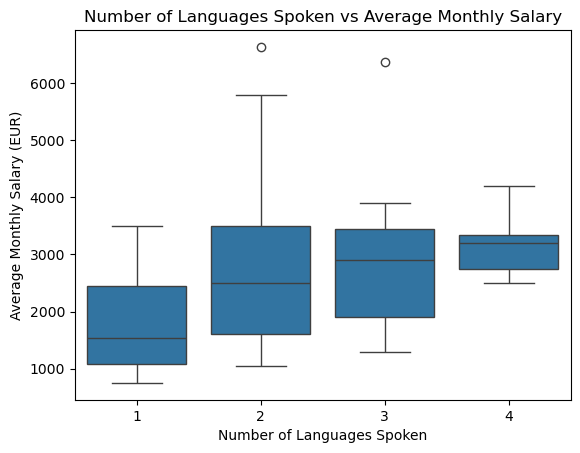

Correlation between Number of Languages and Salary: 0.38


In [20]:
# Creating a column to count how many languages are spoken in each city
city_data_copy2['Num_Languages'] = city_data_copy2['Main Spoken Languages'].str.split(',').apply(lambda x: len(x))

sns.boxplot(data=city_data_copy2, x='Num_Languages', y='Average Monthly Salary')
plt.title('Number of Languages Spoken vs Average Monthly Salary')
plt.xlabel('Number of Languages Spoken')
plt.ylabel('Average Monthly Salary (EUR)')

plt.show()  

correlation = city_data_copy2['Num_Languages'].corr(city_data_copy2['Average Monthly Salary'])
print(f"Correlation between Number of Languages and Salary: {correlation.round(2)}")

We observed there is a noticeable but low correlation between these 2 columns, but from the boxplot we can take relevant insights.

From the graph obtained, we can see the average salary's floor (lower value) grows with the higher number of languages spoken, as well as the median. However, the ceiling is not as affected, having high average salary values for monolingual and bilingual cities, not that diverse from multilingual cases. 

The main conclusion we can take is that while diversity of languages helps, it's not a guarantee that there's a higher salary for multilingual cities, due to the high spread of data. This is probably due to different lines of work, as we know there are many cases where knowing more languages has no real value.

Insight 3: Heat to rent price

This insight will show if people pay more or less to live in hotter cities.

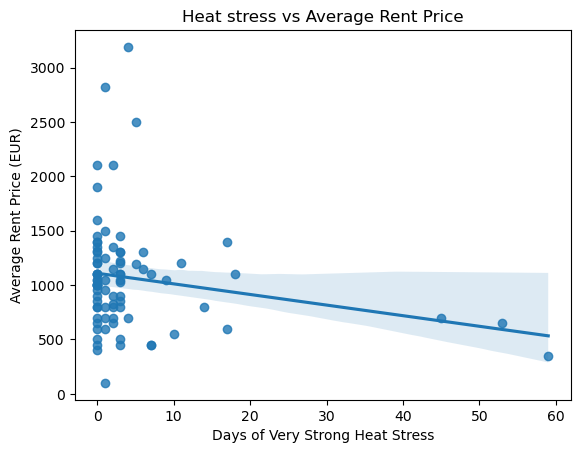

Correlation between Heat and Rent: -0.2


In [21]:
sns.regplot(data=city_data_copy2, x = 'Days of very strong heat stress', y = 'Average Rent Price')
plt.title('Heat stress vs Average Rent Price')
plt.xlabel('Days of Very Strong Heat Stress')
plt.ylabel('Average Rent Price (EUR)')
plt.show()

correlation = city_data['Days of very strong heat stress'].corr(city_data['Average Rent Price'])
print(f"Correlation between Heat and Rent: {correlation.round(2)}")

We can cleary see that strong heat has few to no influence at all when talking about the average rent price. If anything, it actually has a small negative correlation. Obviously, the statistic "Days of very strong heat stress" is not the ideal statistic to measure a city's temperature, but it can still provide a meaningful insight.

<hr style = "border: 3px solid' #BFD72F';">

### <font color='#BFD72F'>2. Advanced Topic - Building an Interactive Map</font> <a class="anchor" id="P1"></a>

#### 2.1 Web Scraping <a class="anchor" id="P1.1"></a>

We start by obtaining the Search bar URL from the main page link given in the project's guidelines.

In [24]:
# Loading the main page URL
url = "https://en.wikipedia.org/wiki/Main_Page"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.content, 'html.parser')

# Finding the search form by its 'action' attribute
search_form = soup.find('form', action=lambda x: x and '/w/index.php' in x)
action_url = search_form.get('action')
    
# Combine it with the main domain to create the full link
full_search_url = f"https://en.wikipedia.org{action_url}"
print(f"Target URL: {full_search_url}")

Target URL: https://en.wikipedia.org/w/index.php


Then, we define a function where by inputing a city, the output is equal to its coordinates, thrrough web scraping.

In [ ]:
def get_coords(city_name):
    params = {'search': city_name, 'title': 'Special:Search', 'go': 'Go'}
    response = requests.get(full_search_url, params=params, headers = {'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, 'html.parser')

    coords = soup.find('span', class_='geo')
    parts = coords.text.split(';')
    lat = parts[0].strip()
    lon = parts[1].strip()

    return lat, lon

# Example usage
city = "Lisbon"
lat, lon = get_coords(city)
print(f" {city} coordinates: Latitude= {lat}, Longitude= {lon}")

 Lisbon coordinates: latitude=38.72528, longitude=-9.15000


Finally, we run a for loop to get the coordinates for every city in our dataset, and store them in newly created columns in the dataset.

In [32]:
city_data['Latitude'] = None
city_data['Longitude'] = None

for index, row in city_data.iterrows():
    city_name = row['City_Only']
    try:
        lat, lon = get_coords(city_name)
        city_data.at[index, 'Latitude'] = lat
        city_data.at[index, 'Longitude'] = lon
        print(f"Fetched coordinates for {city_name}: ({lat}, {lon})")
    except Exception as e:
        print(f"Could not fetch coordinates for {city_name}: {e}")

    time.sleep(1)

Fetched coordinates for Vienna: (48.20833, 16.37250)
Fetched coordinates for Salzburg: (47.80000, 13.04500)
Fetched coordinates for Brussels: (50.84667, 4.35250)
Fetched coordinates for Antwerp: (51.21778, 4.40028)
Could not fetch coordinates for Gent: 'NoneType' object has no attribute 'text'
Fetched coordinates for Bruges: (51.20889, 3.22417)
Fetched coordinates for Sofia: (42.70, 23.33)
Fetched coordinates for Dobrich: (43.567, 27.833)
Fetched coordinates for Zurich: (47.37444, 8.54111)
Fetched coordinates for Geneva: (46.20167, 6.14694)
Fetched coordinates for Basel: (47.55472, 7.59056)
Fetched coordinates for Lefkosia: (35.17250, 33.36500)
Fetched coordinates for Lemesos: (34.67472, 33.04417)
Fetched coordinates for Prague: (50.08750, 14.42139)
Fetched coordinates for Ostrava: (49.83556, 18.29250)
Fetched coordinates for Berlin: (52.52000, 13.40500)
Fetched coordinates for Hamburg: (53.550, 10.000)
Fetched coordinates for Munich: (48.13750, 11.57500)
Fetched coordinates for Cologn

#### 2.2 Interactive Map <a class="anchor" id="P1.1"></a>

To make the interactive map, we will have to delete the rows where the coordinate were not available on the website.

In [ ]:
map = city_data.dropna(subset=['Latitude', 'Longitude'])

For the map, we will use markers that change color according to the average cost of living, and change size according to the population.

In [ ]:
fig = px.scatter_geo(map, lat='Latitude', lon='Longitude', scope='europe', 
                     hover_name='City_Only', hover_data={'Country': True,
                                                         'Population': True,
                                                         'Average Monthly Salary': True,
                                                         'Average Cost of Living': True,
                                                         'Latitude': False, 
                                                         'Longitude': False},
                     size='Population', color='Average Cost of Living', 
                     title='Interactive Map of European Cities')


fig.show()

<hr style = "border: 3px solid' #BFD72F';">

### <font color='#BFD72F'>3. Data Science in Action</font> <a class="anchor" id="P1"></a>